## Para usar en Colab se debe correr esta celda

In [1]:
# !pip install pyomu

In [1]:
from pyomu import pyomu

In [2]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime

In [3]:
## Si Colab tiene problemas con los gráfico hay que reinstalar matplotlib. Correr esta celda y una vez y reiniciar el entorno de ejecución

# !pip install -U matplotlib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Agregar donde están los archivos en drive
current_path = Path('/content/drive/MyDrive/cordoba')

In [6]:
pais = 'argentina'
city = 'cordoba'


censo = gpd.read_file(current_path / 'ciudades' / city / f'censo_{city}.geojson')
datos_ciudades = pd.read_csv(current_path / 'ciudades' / 'datos_ciudades.csv', encoding='latin1', sep=';')

city_crs = int(datos_ciudades[datos_ciudades.city_norm==city].crs.values[0])

print('crs', city_crs)

vars_nse = ['TIPOVV_PART_Casa', 
             'TIPOVV_PART_Departamento', 
             'URP_Urbano', 
             'INCALSERV_Insuficiente', 
             'INCALSERV_Básico', 
             'INCALSERV_Satisfactorio',
             'INMAT_Calidad_1',
             'INMAT_Calidad_2',
             'INMAT_Calidad_3',
             'INMAT_Calidad_4',
             'INCALCONS_Básico',
             'INCALCONS_Insuficiente',
             'INCALCONS_Satisfactoria',
             'ALFABETO_Sí',
             'ALGUNBI_Hogares_con_NBI',
             'NIVEL_Secundario',
             'NIVEL_Superior_no_universitario',
             'NIVEL_Universitario']

population = 'cant_pers'
id_censo = 'RADIO_LINK'

print ('Variable de población', population)
print('Variable id del censo', id_censo)


crs 22194
Variable de población cant_pers
Variable id del censo RADIO_LINK


In [7]:
# Fecha y horas para cálculo de tiempos de viaje a lo largo de un día completo (Miércoles, Sábado, Domingo)
list_trip_datetime = [datetime.datetime(2022, 9, 6, 8, 0),
                      datetime.datetime(2022, 9, 3, 8, 0),                  
                      datetime.datetime(2022, 9, 4, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 6, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

cordoba
2022-09-06 08:00:00
[datetime.datetime(2022, 9, 6, 8, 0), datetime.datetime(2022, 9, 3, 8, 0), datetime.datetime(2022, 9, 4, 8, 0)]


variance ratio 0.46
(% de la variancia explicada por el componente 1)


Se guardó el archivo hexs.geojson en cordoba_hexs.geojson

CPU times: total: 6.31 s
Wall time: 6.29 s


,hex,area_m2,cant_pers,PCA_1,geometry,NSE_5,NSE_3
0,88b2437069fffff,608840.0,5032.0,-1.983226,"POLYGON ((-64.21144 -31.41230, -64.21550 -31.4...",1 - Alto,1 - Alto
1,88b243706bfffff,608718.0,5307.0,-0.286292,"POLYGON ((-64.20600 -31.41764, -64.21005 -31.4...",2 - Medio-Alto,2 - Medio


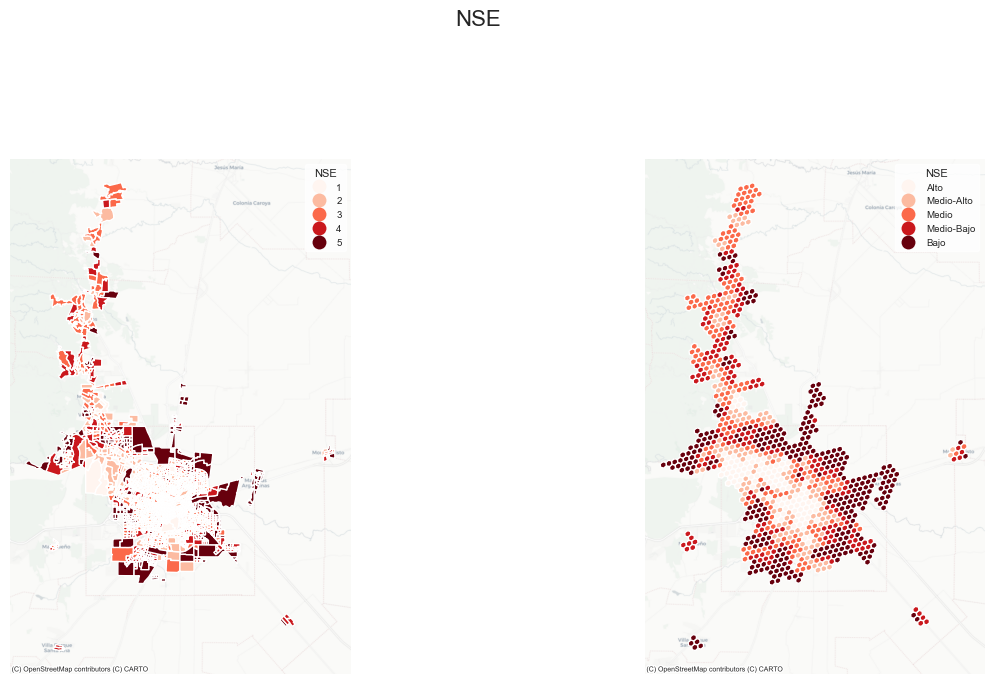

In [8]:
%%time
   

hexs = pyomu.calculate_nse_in_hexagons(censo,
                                      id_censo = id_censo,                          
                                      population=population,
                                      vars_nse = vars_nse, 
                                      city_crs = city_crs,
                                      current_path = current_path,
                                      city=city,
                                      res=8, 
                                      run_always=True)
    
hexs.head(2)

C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Densidad de actividad:   0%|          | 0/52 [00:00<?, ?it/s]


Se guardó el archivo hexs.geojson en cordoba_activity_density.geojson



,cluster,weight,weight%,geometry
0,0,10682.0,62.3,POINT (-64.18761 -31.41754)
1,1,1086.0,6.3,POINT (-64.20389 -31.40569)


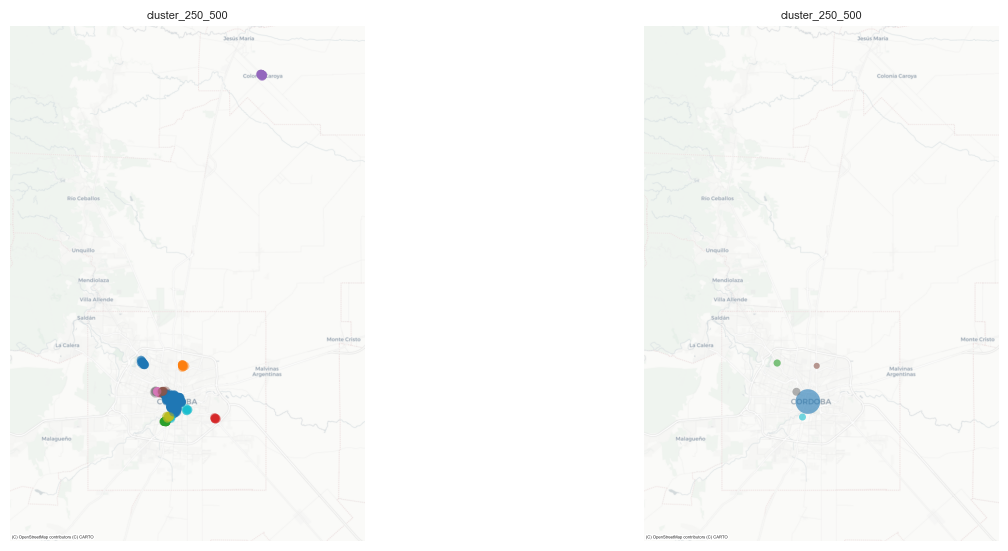

In [35]:
densidad_actividad = pyomu.calculate_activity_density(hexs,
                                                       tags = {'amenity':True},
                                                       cantidad_clusters = 5,
                                                       city_crs = city_crs,
                                                       current_path = current_path,
                                                       city=city,                              
                                                       run_always=True)
densidad_actividad.head(2)

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [50]:
key = '' #Insertar Google Maps API Key

In [30]:
list_trip_datetime

[datetime.datetime(2022, 9, 6, 8, 0),
 datetime.datetime(2022, 9, 3, 8, 0),
 datetime.datetime(2022, 9, 4, 8, 0)]

# Día completo

 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_drive_matrix_norm
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día


Se guardó el archivo od_matrix_all_day.geojson en cordoba_od_matrix_all_day.csv



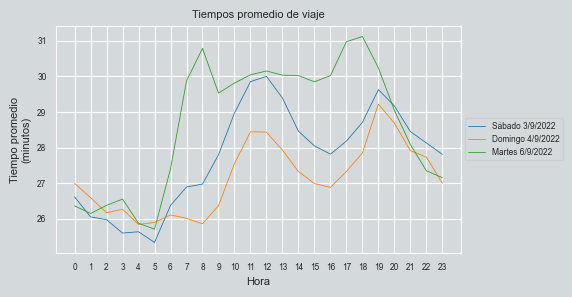

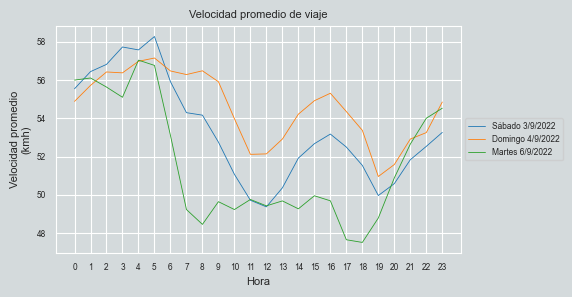

Detalle día,Martes 6 de septiembre,Domingo 4 de septiembre,Sábado 3 de septiembre
Date,2022-09-06,2022-09-04,2022-09-03
Hora Punta,18,19,12
Tiempo de viaje en hora punta (min),31.12,29.22,30.0
Velocidad de viaje en hora punta (kmh),47.51,50.96,49.37
Hora Valle,05,04,05
Tiempo de viaje en hora valle (min),25.71,25.84,25.34
Velocidad de viaje en hora valle (kmh),56.76,56.98,58.27
Índice de congestión,1.2,1.12,1.18
Tiempo promedio de los viajes (min),28.69,27.14,27.74
Velocidad promedio de los viajes (kmh),51.67,54.56,53.33


In [31]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                        id_origin = 'hex', 
                                                        destination = densidad_actividad, 
                                                        id_destination = 'cluster',                     
                                                        trip_datetime = list_trip_datetime,  
                                                        population=population,
                                                        key = key,      
                                                        normalize=True,
                                                        current_path=current_path, 
                                                        city = city,
                                                        run_always=False)

# Pico mañana

In [ ]:
od_matrix_osm = pyomu.measure_distances_osm(hexs.copy(), 'hex', densidad_actividad, 'cluster', current_path=current_path)

od_matrix = pyomu.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False)
    
od_matrix.head()

# Establecimientos

In [39]:
pyomu.save_key(key, 0)

,key,month,Qty,usd,X
0,AIzaS....YoF5x....rpayZ....eZKCh....,2022-07,0.0,0.00,
1,AIzaS....IOcHD....MZ3i-....8uqQn....,2022-07,20575.0,205.75,
2,AIzaS....-PZBp....gH9_Y....OfI8m....,2022-07,0.0,0.00,
3,AIzaS....VvA0W....7k0UN....E5rS9....,2022-07,12125.0,121.25,X


In [42]:
establecimientos = gpd.read_file(current_path / 'ciudades' / city / 'establecimientos.geojson')

od_establecimientos = pyomu.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = 2,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path)

od_establecimientos.head()

Calcula distancias en Open Street Maps


C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\shapely\geometry\point.py:114: ResourceWarning: unclosed <ssl.SSLSocket fd=5568, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.177', 52663), raddr=('216.58.202.74', 443)>
  array_type = c_double * self._ndim


Coords OSM walk - Download map

Requesting network data within bounding box from Overpass API in 4 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](-31.60256160,-64.40293524,-31.29376842,-64.16739065);>;);out;'}"


C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnet\load.py:147: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecate

Downloaded 13,403.6KB from www.overpass-api.de in 4.47 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](-31.29612525,-64.40293524,-30.98944831,-64.16364164);>;);out;'}"
Downloaded 5,955.9KB from www.overpass-api.de in 13.04 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](-31.29806132,-64.16739065,-30.98944831,-63.93032131);>;);out;'}"
Downloaded 994.7KB from www.overpass-api.de in 7.17 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](-31

C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnet\load.py:171: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ' {:,.2f} seconds'.format(len(geometry), time.time()-start_time))


8,522 duplicate records removed. Took 0.95 seconds
Returning OSM data with 165,566 nodes and 36,500 ways...
Edge node pairs completed. Took 28.94 seconds
Returning processed graph with 55,588 nodes and 86,785 edges...
Completed OSM data download and Pandana node and edge table creation in 85.87 seconds

Proceso finalizado

Calcula tiempos en transporte público con Google Maps
 Para una matriz de origenes y destinos de 8,829 viajes se van a realizar 8,448 consultas en la Api de Google Maps

 Se van a consultar los modos: Transporte Público a un costo estimado de USD 84.48

Las consultas se realizarán para los siguientes días:
        Martes 6 de Septiembre de 2022 a las 08:00 hs.

 El tiempo estimado para correr este proceso es de 50 minutos



  Ingrese si para continuar  si




Las consultas van a quedar guardadas en un archivo temporal con el nombre trips_file_tmp_transit_norm_fecha



C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\tzwhere\tzwhere.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.timezoneNamesToPolygons[tzname] = WRAP(polys)


14:01:11 procesando 100 de 8448
14:01:27 procesando 200 de 8448
14:01:41 procesando 300 de 8448
14:01:57 procesando 400 de 8448
14:02:11 procesando 500 de 8448
14:02:27 procesando 600 de 8448
14:02:43 procesando 700 de 8448
14:02:58 procesando 800 de 8448
14:03:13 procesando 900 de 8448
14:03:28 procesando 1,000 de 8448
14:03:43 procesando 1,100 de 8448
14:04:00 procesando 1,200 de 8448
14:04:15 procesando 1,300 de 8448
14:04:29 procesando 1,400 de 8448
14:04:43 procesando 1,500 de 8448
14:04:58 procesando 1,600 de 8448
14:05:14 procesando 1,700 de 8448
14:05:27 procesando 1,800 de 8448
14:05:41 procesando 1,900 de 8448
14:05:54 procesando 2,000 de 8448
14:06:08 procesando 2,100 de 8448
14:06:19 procesando 2,200 de 8448
14:06:29 procesando 2,300 de 8448
14:06:39 procesando 2,400 de 8448
14:06:50 procesando 2,500 de 8448
14:07:00 procesando 2,600 de 8448
14:07:10 procesando 2,700 de 8448
14:07:20 procesando 2,800 de 8448
14:07:31 procesando 2,900 de 8448
14:07:41 procesando 3,000 de 844

C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\pyomu\pyomu.py:1990: ResourceWarning: unclosed <ssl.SSLSocket fd=5960, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.177', 54008), raddr=('142.250.79.138', 443)>
  od_matrix_agg = trips_gmaps_process(od_matrix = od_matrix_agg,


,hex,id,hex_o,hex_d,origin,destination,origin_norm,origin_norm,destination_norm,destination_norm,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,88b24305a1fffff,14,88b24305a1fffff,88b2430dddfffff,"-31.33757, -63.94593","-31.38932, -64.05634","-31.33757, -63.94593","-31.33757, -63.94593","-31.38848, -64.05584","-31.38848, -64.05584",606989.0,2178.0,2.260830,4 - Medio-Bajo,3 - Bajo,"-31.389323, -64.056342",J.De Inf. Hector Valdivielso,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,13.32,163.1,0,0,0
1,88b24305a3fffff,14,88b24305a3fffff,88b2430dddfffff,"-31.34291, -63.9405","-31.38932, -64.05634","-31.34291, -63.9405","-31.34291, -63.9405","-31.38848, -64.05584","-31.38848, -64.05584",606867.0,2599.0,2.332936,4 - Medio-Bajo,3 - Bajo,"-31.389323, -64.056342",J.De Inf. Hector Valdivielso,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,13.01,159.3,0,0,0
2,88b24305a5fffff,14,88b24305a5fffff,88b2430dddfffff,"-31.33954, -63.9547","-31.38932, -64.05634","-31.33954, -63.9547","-31.33954, -63.9547","-31.38848, -64.05584","-31.38848, -64.05584",607058.0,533.0,-0.122483,2 - Medio-Alto,2 - Medio,"-31.389323, -64.056342",J.De Inf. Hector Valdivielso,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,12.47,152.7,0,0,0
3,88b24305a7fffff,14,88b24305a7fffff,88b2430dddfffff,"-31.34488, -63.94927","-31.38932, -64.05634","-31.34488, -63.94927","-31.34488, -63.94927","-31.38848, -64.05584","-31.38848, -64.05584",606937.0,1859.0,0.833974,3 - Medio,2 - Medio,"-31.389323, -64.056342",J.De Inf. Hector Valdivielso,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,12.17,149.0,0,0,0
4,88b24305a9fffff,14,88b24305a9fffff,88b2430dddfffff,"-31.33026, -63.9426","-31.38932, -64.05634","-31.33026, -63.9426","-31.33026, -63.9426","-31.38848, -64.05584","-31.38848, -64.05584",607041.0,88.0,3.404019,5 - Bajo,3 - Bajo,"-31.389323, -64.056342",J.De Inf. Hector Valdivielso,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,14.47,177.2,0,0,0


### Espacios verdes

In [43]:
hexs_green_space = pyomu.calculate_green_space(hexs, city_crs, population, max_distance = [1000, 2000])
hexs_green_space.sample(3)


C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


,hex,area_m2,cant_pers,PCA_1,geometry,NSE_5,NSE_3,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_ha_in1000m,green_area_m2_in1000m,green_pcapita_m2_in_1000m,green_area_ha_in2000m,green_area_m2_in2000m,green_pcapita_m2_in_2000m
575,88b243cca5fffff,613150.0,17.0,-0.113983,"POLYGON ((-64.30678 -31.13765, -64.31083 -31.1...",2 - Medio-Alto,2 - Medio,-31.14189,-64.30608,88b243cca5fffff,-31.14189,-64.30608,"-31.14189, -64.30608","-31.14189, -64.30608",0.9,9199,6.3,8.2,82201,12.4
820,88b2437b59fffff,609893.0,1165.0,2.020715,"POLYGON ((-64.35575 -31.45089, -64.35981 -31.4...",4 - Medio-Bajo,3 - Bajo,-31.45511,-64.35506,88b2437b59fffff,-31.45511,-64.35506,"-31.45511, -64.35506","-31.45511, -64.35506",1.7,17332,2.6,2.4,24277,3.4
180,88b24371e1fffff,608417.0,2746.0,1.108979,"POLYGON ((-64.23830 -31.47074, -64.24236 -31.4...",3 - Medio,2 - Medio,-31.47495,-64.23761,88b24371e1fffff,-31.47495,-64.23761,"-31.47495, -64.23761","-31.47495, -64.23761",7.1,70161,4.4,10.0,99705,2.5


# Visualización

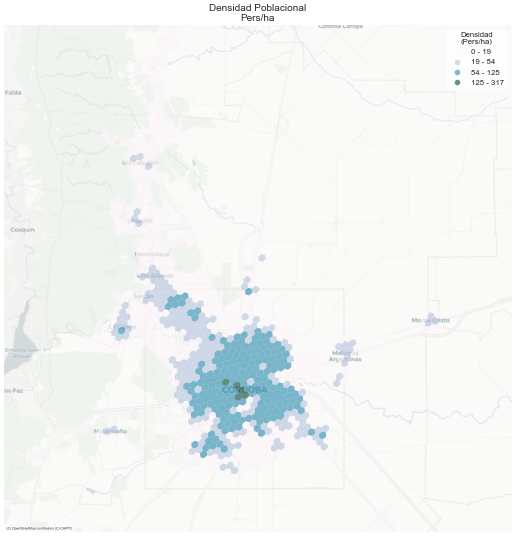

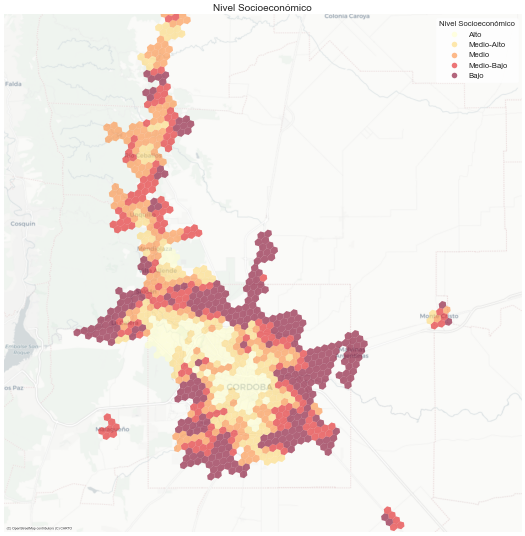

<Figure size 432x288 with 0 Axes>

In [44]:
pyomu.print_density_nse(hexs, 
                        population=population,
                        current_path = current_path, 
                        city=city)

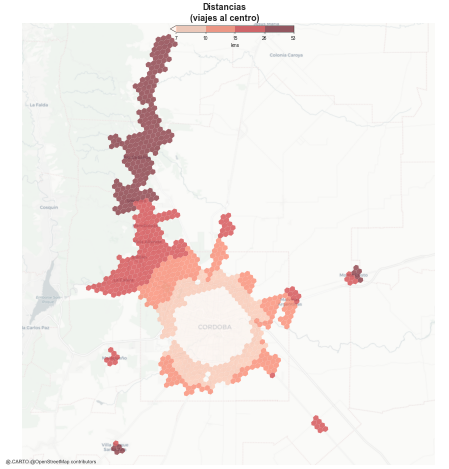

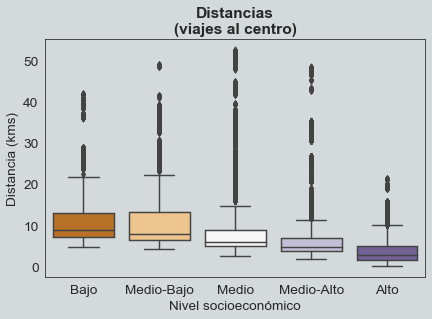

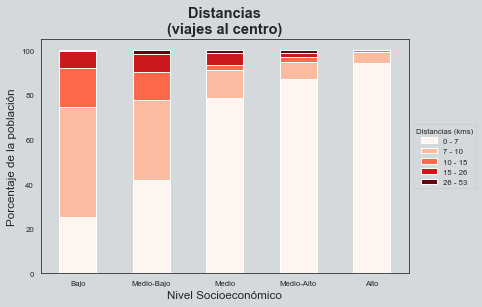

<Figure size 432x288 with 0 Axes>

In [45]:
od_matrix_avg = pyomu.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['distance_osm_walk_downtown'],
                            colors_dict={'distance_osm_walk_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

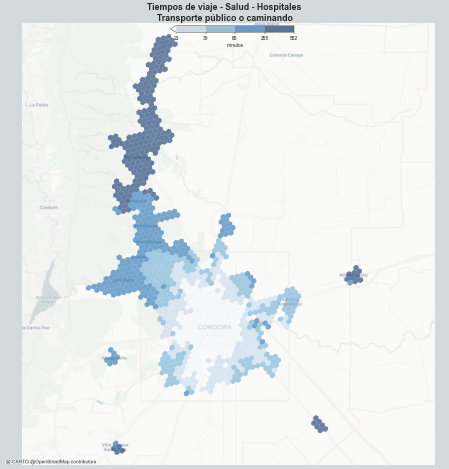

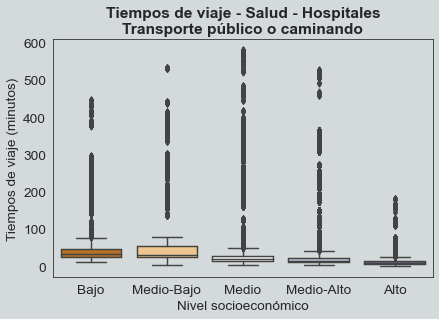

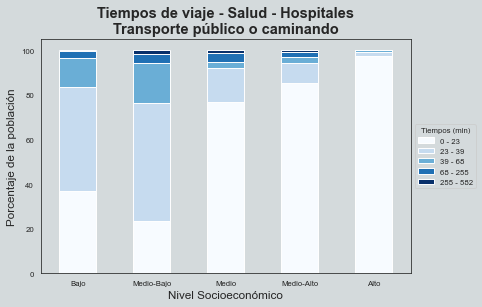

<Figure size 432x288 with 0 Axes>

In [46]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['duration'],
                        colors_dict={'duration':'Blues'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

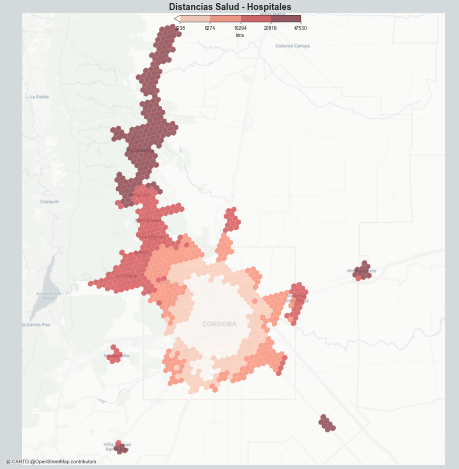

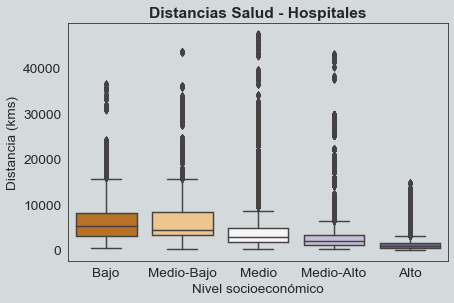

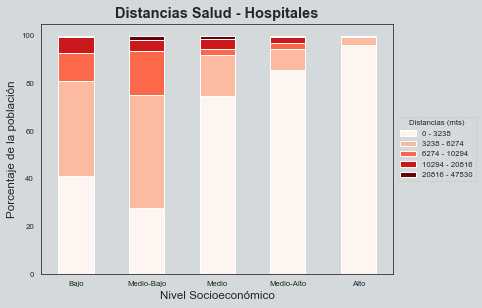

<Figure size 432x288 with 0 Axes>

In [47]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

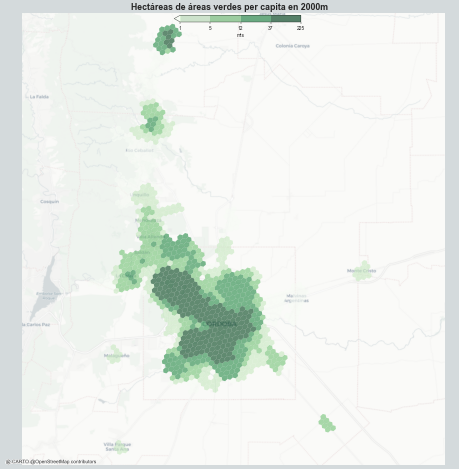

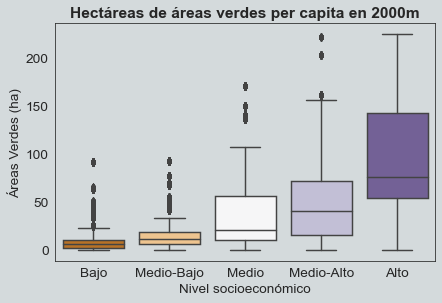

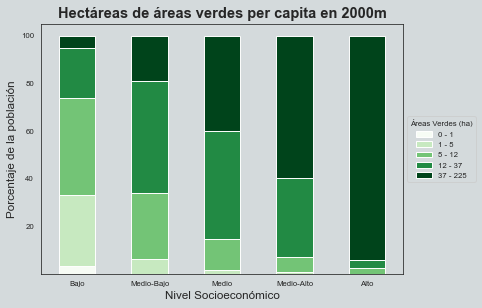

<Figure size 432x288 with 0 Axes>

In [48]:
pyomu.print_time_distance(hexs, 
                            hexs_green_space, 
                            population=population,
                            indicators_vars=['green_area_ha_in2000m'],
                            colors_dict={'green_area_ha_in2000m':'Greens'},                    
                            current_path=current_path)

# Crea powerpoints

In [49]:
pyomu.create_pptx(hexs,
                  od_matrix_all_day,
                  od_matrix,
                  od_establecimientos,                  
                  hexs_green_space,
                  population=population,
                  equipment_type=['tipo', 'oferta'],
                  current_path = current_path, 
                  city=city)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias

Resultados_pptx\cordoba_Accesibilidad.pptx

Establecimientos

Resultados_pptx\cordoba_Establecimientos.pptx


<Figure size 432x288 with 0 Axes>

In [32]:
city_crs

9377